In [1]:
import numpy as np
import matplotlib.pyplot as plt

im1=np.random.randint(0,255, size=(50,50)).astype(np.float32)
im2=np.random.randint(0,255, size=(50,50,3)).astype(np.float32)

ax1=plt.subplot(121)
ax2=plt.subplot(122)
ax1.imshow(im1,cmap='gray')
ax1.set_title("Image d'une matrice 2D")
ax2.imshow(im2)
ax2.set_title("Image d'une matrice 3D")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 2 Axes>

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model


/home/meryll/miniconda3/envs/eca/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


4


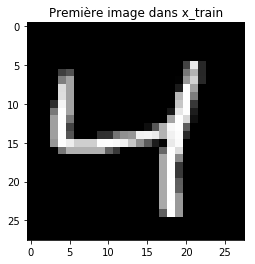

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
w, h = 28, 28 #taille des images

plt.imshow(x_train[2],cmap="gray")
print(y_train[2])
plt.title("Première image dans x_train")
plt.show()

In [4]:
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)
mon_shape = (w, h, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
print("Initial:",y_train[0])
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Transformed:",y_train[0])

Initial: 5
Transformed: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
mon_input=keras.engine.input_layer.Input(shape=mon_shape)

# Feature Extraction
cnn=Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu')(mon_input)
cnn=MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(cnn)
cnn=Conv2D(64, (5, 5), activation='relu')(cnn)
cnn=MaxPooling2D(pool_size=(2, 2))(cnn)

# Learning Process
output_cnn=Flatten()(cnn)
cnn=Dense(1000, activation='relu')(output_cnn)
cnn=Dense(num_classes, activation='softmax')(cnn)

# Building the model
model=Model(inputs=[mon_input], outputs=[cnn])

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
mon_batch_size = 128
epo = 1

In [12]:
model.fit(x_train, y_train,
          batch_size=mon_batch_size,
          epochs=epo,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 35s 590us/step - loss: 0.0246 - acc: 0.9924 - val_loss: 0.0271 - val_acc: 0.9906


In [17]:
# plt.imshow(x_train[2],cmap="gray")
# plt.title("Première image dans x_train")
# plt.show()
np.argsort(model.predict(np.array([x_train[1]])))

array([[7, 5, 4, 1, 3, 2, 8, 9, 6, 0]])